# Point-like sources extraction with SExtractor

This short notebook can be seen as a preamble to the more complete [SingleBand-PSF.ipynb](03.1_SingleBand-PSF.ipynb). Here, the goal is to run SExtractor on an image and to detect the point-like sources using a MU_MAX v. MAG_AUTO plot for later use with PSFEx to reconstruct the PSF of the telescope.

In [2]:
import glob
import dja_sepp

In [ ]:
home = "/home/aurelien/DAWN/DJA_SEpp"
field = 'GDS'
filter = 'f200w'

> 
----- SExtractor 2.28.0 started on 2024-04-29 at 11:10:15 with 1 thread

> Setting catalog parameters
> Reading detection filter
> Initializing Neural Network
> Reading Neural Network Weights
> Initializing check-image(s)
> Initializing catalog
> Looking for gds-grizli-v7.2-f200w-clear_drc_sci.fits
----- Measuring from: gds-grizli-v7.2-f200w-clear_drc_sci.fits
      "Unnamed" / no ext. header / 28672x28672 / 32 bits (floats)
> Looking for gds-grizli-v7.2-f200w-clear_drc_wht.fits
----- Weighting from: gds-grizli-v7.2-f200w-clear_drc_wht.fits
      "Unnamed" / no ext. header / 28672x28672 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:  256
> Setting up background map at line:  512
> Setting up background map at line:  768
> Setting up background map at line: 1024
> Setting up background map at line: 1280
> Setting up background map at line: 1536
> Setting up background map at line: 1792
> Setting up background map at l

DBSCAN clustering : (array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), array([  767, 11990,     8,    14,     7,     6,     9,     8,     7,
          19,     5,     5,     9,     6,     5,     7,     7,    11,
          12,     9,    12,     6,     9,    23,     9,     6,     7,
          11,     6,     7,    13,     7,     7,    12,     8,     5,
           7,     5,     5,     4,     5,     4,     5,     5,     5,
           7,     5,     5,     5,     2,     6]))


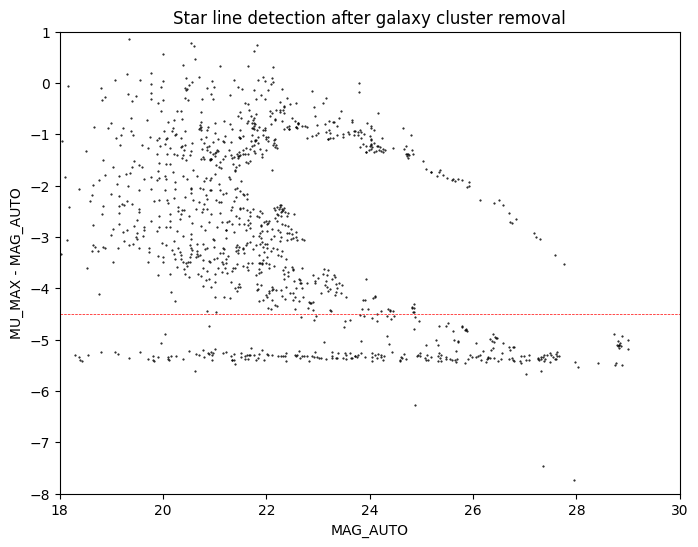

RANSAC Slope : -0.010
Star line    : -5.367


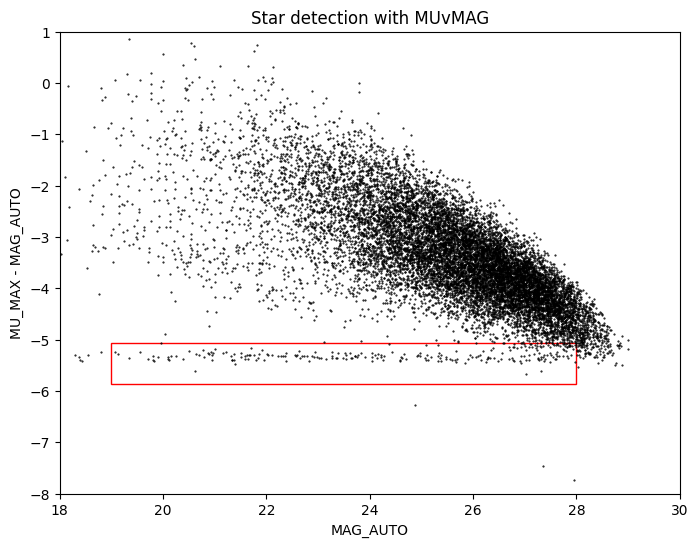

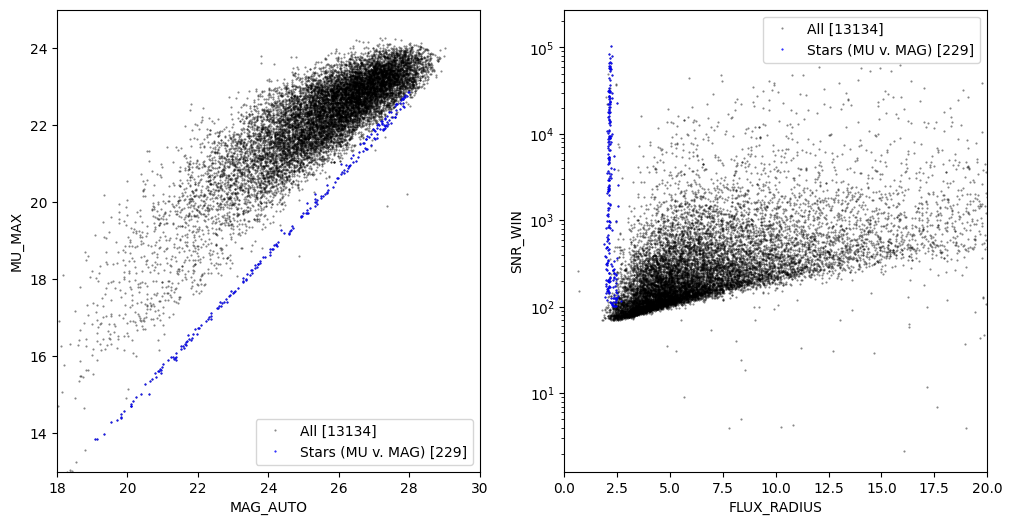

In [2]:
dja_sepp.sextractor.extract_stars(detect_img      = glob.glob(f"{home}/fields/{field}/image/*{filter}*sci*.fits")[0], \
                                  weight_img      = glob.glob(f"{home}/fields/{field}/image/*{filter}*wht*.fits")[0], \
                                  output_cat      = f"{home}/fields/{field}/catalog/{field}_drc_cat.fits", \
                                  output_cat_star = f"{home}/fields/{field}/catalog/{field}_drc_cat_star.fits", \
                                  config_folder   = f"{home}/config", \
                                  dir_chckimg     = f"{home}/fields/{field}/catalog/checkimages", \
                                  detect_thresh = 8.0, \
                                  y_max = -5.0, \
                                  save_chckimg = False, plot = True, clean = True, verbose = True)